In [2]:
"""
    Instruções:
        1- Plote neste notebook os gráficos, m
        apas e visualizações (interativas ou não) que você acha que fazem sentido para o desafio.
"""

'\n    Instruções:\n        1- Plote neste notebook os gráficos, m\n        apas e visualizações (interativas ou não) que você acha que fazem sentido para o desafio.\n'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
#Vamos importar os municipios de MG por inteiro
gdf_municipios = gpd.read_file(r"dados/municipios-mg.geojson")

In [5]:
desmatamento_mg = gpd.read_file(r"dados/mg_desmatamento_pib.geojson")
desmatamento_mg

,municipio,area_desmatada_km2,pib_per_capita,atividade_principal,geometry
0,Abadia dos Dourados,0.378671,25174.26,pecuaria,"POLYGON ((241429.802 7990562.876, 242359.697 7..."
1,Abaeté,0.210202,23266.10,outros,"POLYGON ((480831.209 7911603.048, 481764.623 7..."
2,Aimorés,1.225457,25402.54,energia_agua_esgoto,"POLYGON ((917636.331 7851855.699, 919658.695 7..."
3,Alfenas,0.165028,43049.74,outros,"POLYGON ((398902.740 7661977.627, 401605.413 7..."
4,Alfredo Vasconcelos,0.322131,21364.59,agricultura,"POLYGON ((642489.670 7666380.602, 643541.338 7..."
...,...,...,...,...,...
421,Várzea da Palma,1.437560,26623.10,industrias_transformacao,"POLYGON ((520682.416 8114726.420, 521934.526 8..."
422,Água Boa,0.361136,14421.07,setor_publico,"POLYGON ((780531.204 8031807.116, 781557.419 8..."
423,Água Comprida,1.631970,115725.51,agricultura,"POLYGON ((174694.719 7802977.511, 175454.242 7..."
424,Águas Formosas,0.262786,14913.12,outros,"POLYGON ((930260.887 8127064.184, 930153.995 8..."


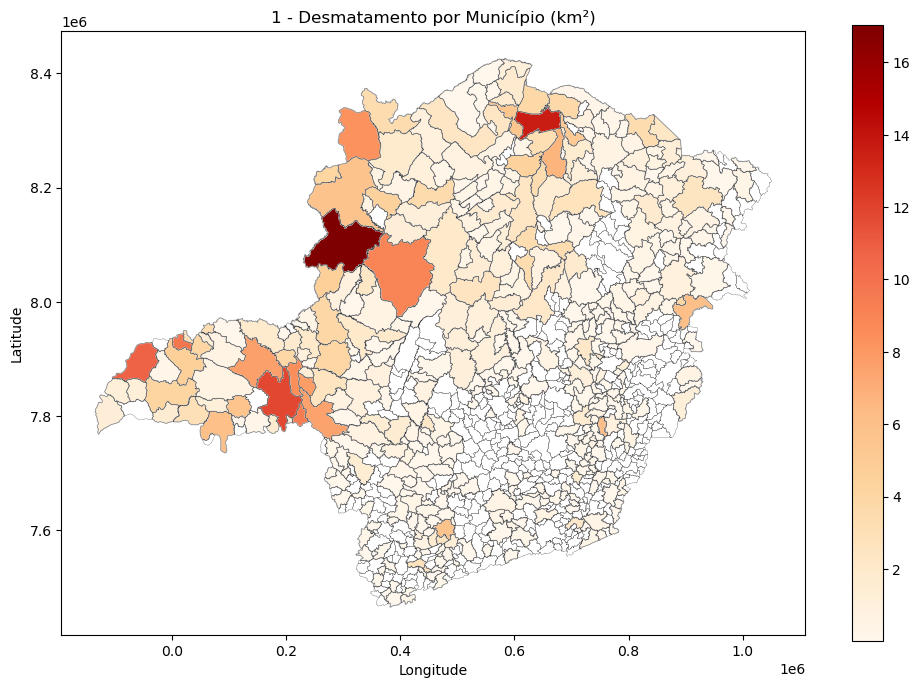

In [6]:
# Plotar o mapa com cores representando a intensidade do desmatamento
fig, ax = plt.subplots(figsize=(12, 8))
desmatamento_mg.plot(column='area_desmatada_km2', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
gdf_municipios.boundary.plot(ax=ax, color='black', linewidth=0.15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('1 - Desmatamento por Município (km²)')
plt.show()

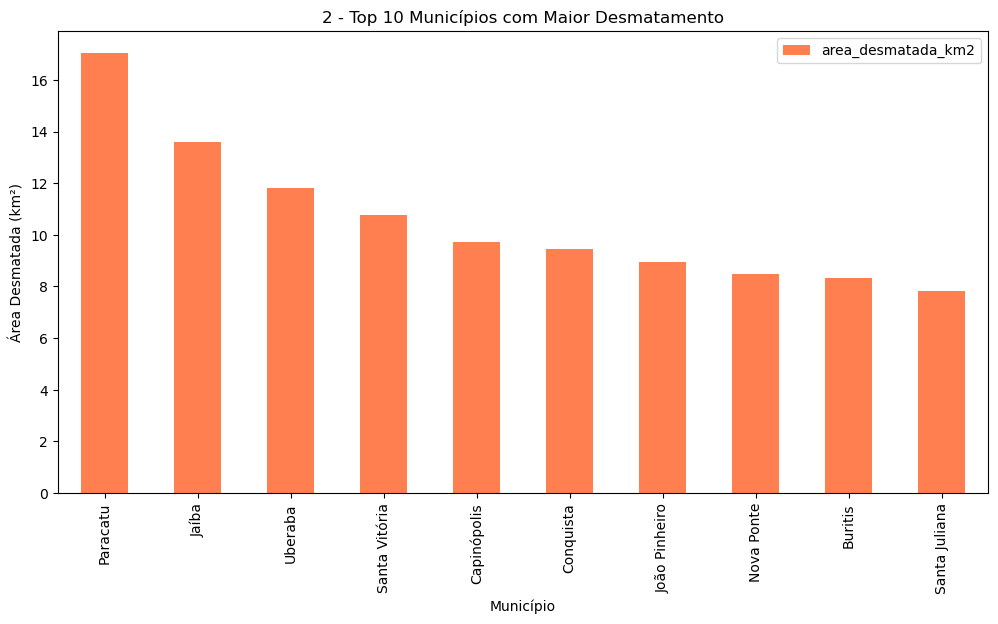

In [7]:
# Ordenar o GeoDataFrame pelo desmatamento
gdf_sorted = desmatamento_mg.sort_values(by='area_desmatada_km2', ascending=False)

# Plotar o ranking dos municípios com maior desmatamento
fig, ax = plt.subplots(figsize=(12, 6))
gdf_sorted.head(10).plot(kind='bar', x='municipio', y='area_desmatada_km2', color='coral', ax=ax)
plt.title('2 - Top 10 Municípios com Maior Desmatamento')
plt.xlabel('Município')
plt.ylabel('Área Desmatada (km²)')
plt.show()

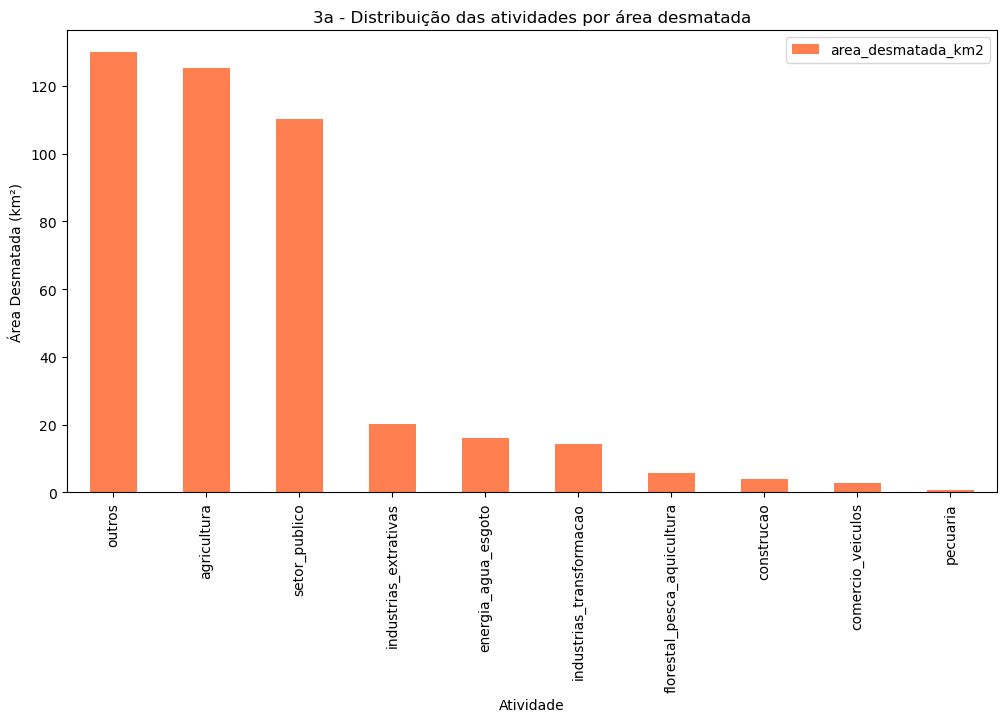

In [8]:
#Vamos agora ver por atividade_principal o quanto cada uma desmata ao todo plotado
area_por_atividade = desmatamento_mg.groupby('atividade_principal')['area_desmatada_km2'].sum().reset_index()
area_por_atividade = area_por_atividade.sort_values(by='area_desmatada_km2', ascending=False)

gdf_sorted = area_por_atividade.sort_values(by='area_desmatada_km2', ascending=False)

# Plotar o ranking dos municípios com maior desmatamento
fig, ax = plt.subplots(figsize=(12, 6))
gdf_sorted.head(10).plot(kind='bar', x='atividade_principal', y='area_desmatada_km2', color='coral', ax=ax)
plt.title('3a - Distribuição das atividades por área desmatada')
plt.xlabel('Atividade')
plt.ylabel('Área Desmatada (km²)')
plt.show()

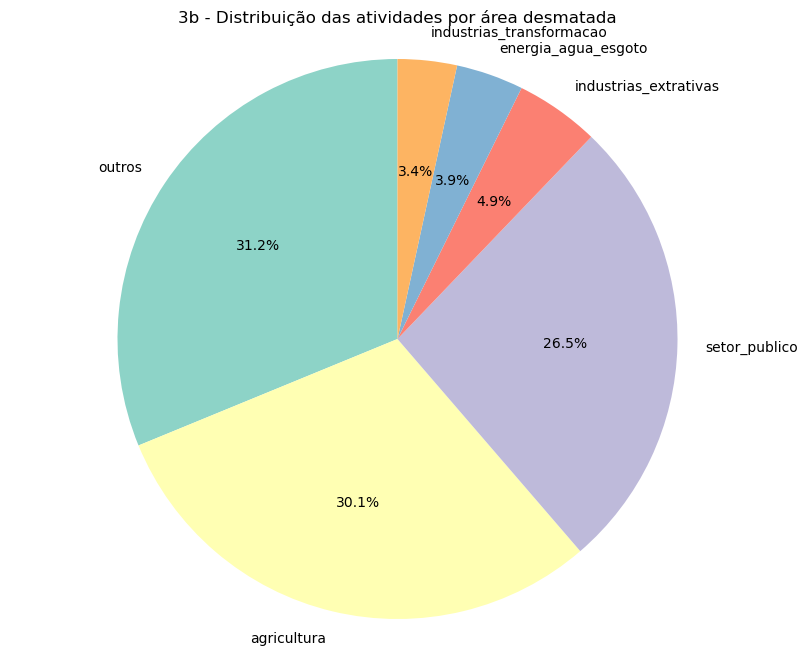

In [9]:
#Agora o mesmo plot anterior, porém dessa vez com uma visão mais voltada a distribuição
data_plot = area_por_atividade.head(6)
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(data_plot['area_desmatada_km2'], labels=data_plot['atividade_principal'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
ax.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo.

title = plt.title('3b - Distribuição das atividades por área desmatada')
plt.show()

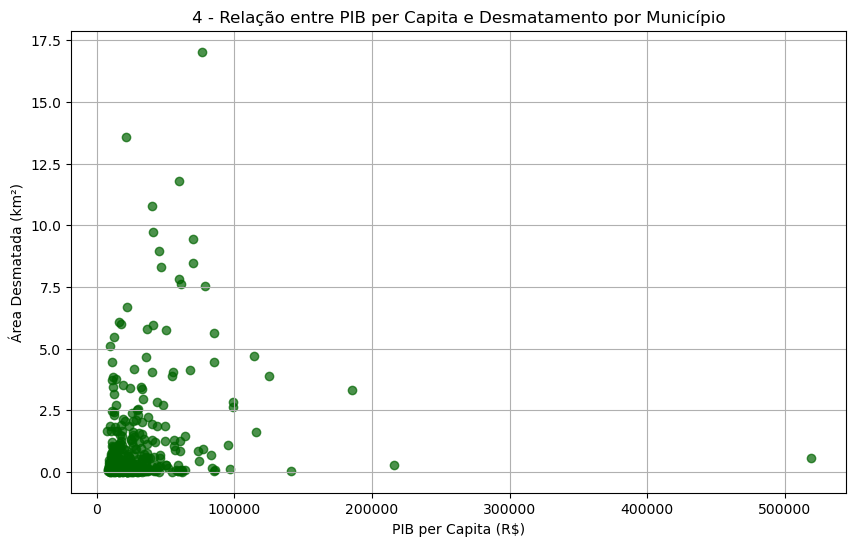

In [10]:
#PIB per capita por desmatamento
plt.figure(figsize=(10, 6))
plt.scatter(desmatamento_mg['pib_per_capita'], desmatamento_mg['area_desmatada_km2'], color='darkgreen', alpha=0.7)
plt.title('4 - Relação entre PIB per Capita e Desmatamento por Município')
plt.xlabel('PIB per Capita (R$)')
plt.ylabel('Área Desmatada (km²)')
plt.grid(True)
plt.show()

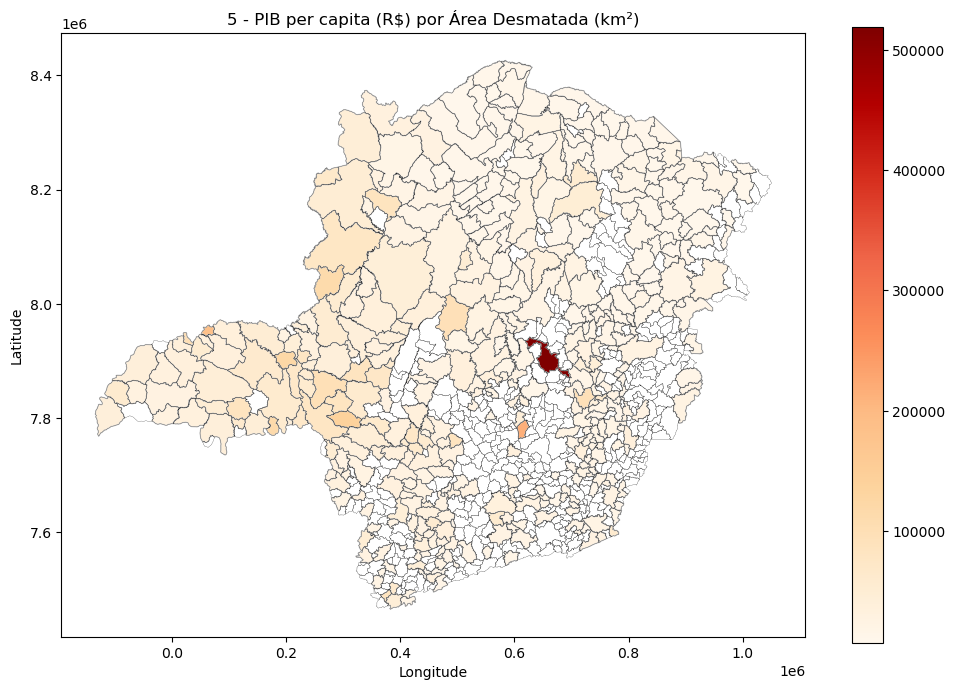

In [11]:
# Plotar o mapa com cores representando a intensidade do PIB por área desmatada
fig, ax = plt.subplots(figsize=(12, 8))
desmatamento_mg.plot(column='pib_per_capita', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
gdf_municipios.boundary.plot(ax=ax, color='black', linewidth=0.15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('5 - PIB per capita (R$) por Área Desmatada (km²)')
plt.show()